#linear training models
#linear regression 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

### Classical linear regression model using linear algebra

In [29]:
#generate y = 4 + 3 * x0 + Gaussian noise/error
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

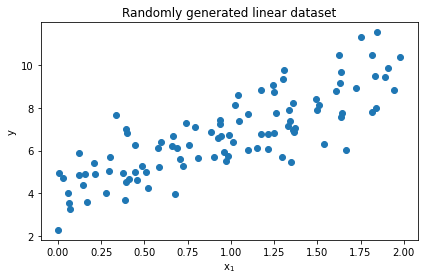

In [30]:
plt.scatter(X, y)
plt.title("Randomly generated linear dataset")
plt.xlabel("x$_{1}$")
plt.ylabel("y")
plt.tight_layout()
plt.show()

In [31]:
#add x0 = 1 to each x instance
X_b = np.c_[np.ones((100, 1)), X]
#numpy linear algebra module to compute the inverse of matrix
#and dot() product method for matrix multiplication
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#print theta_best
theta_best

array([[4.08076785],
       [2.75950567]])

In [32]:
#expected theta0 = 4 (bias/intercept term) & theta1 = 3 (slope)
# instead got theta0 = 4.192 & theta1 = 3.039
#now make predictions
X_new = np.array([[0], [2]])
#add x0 = 1 to each x instance
X_new_b = np.c_[np.ones((2, 1)), X_new]

#predict
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08076785],
       [9.59977918]])

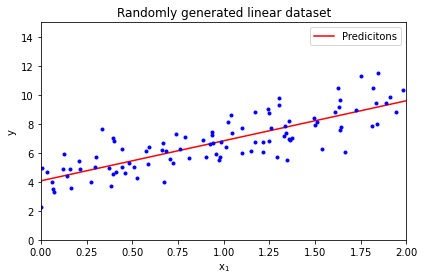

In [33]:
#plot model predictions
plt.plot(X_new, y_predict, "r-", label = "Predicitons")
plt.plot(X, y, "b.")
plt.title("Randomly generated linear dataset")
plt.xlabel("x$_{1}$")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
np.array([[0], [2]])

array([[0],
       [2]])

In [35]:
np.c_[np.ones((2, 1)), np.array([[0], [2]])]

array([[1., 0.],
       [1., 2.]])

### Scikit-learn linear regression model

In [36]:
#import Scikit-learn linear regression
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#pring theta0/intercepty/bias and theta1/slope terms
print(f"Bias term: {lin_reg.intercept_}, Slope: {lin_reg.coef_ }")

#predictions
lin_reg_y_predict = lin_reg.predict(X_new)
print(f"Prediction: {lin_reg_y_predict}")

Bias term: [4.08076785], Slope: [[2.75950567]]
Prediction: [[4.08076785]
 [9.59977918]]


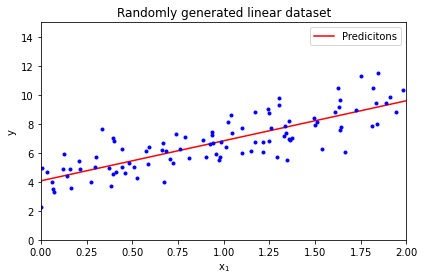

In [38]:
#plot scikit-learn linear regression model predictions
plt.plot(X_new, lin_reg_y_predict, "r-", label = "Predicitons")
plt.plot(X, y, "b.")
plt.title("Randomly generated linear dataset")
plt.xlabel("x$_{1}$")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.tight_layout()
plt.show()

### Classical Batch Gradient Descent algorithm implementation

In [95]:
#learning rate
eta = 0.1
#number of iterations
n_iterations = 20
m = 100

#random initialization
theta = np.random.randn(2, 1)

#arrays for plot
grad_ar = []
iter_ar = []
theta_ar = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    #fill arrays
    grad_ar.append(gradients)
    iter_ar.append(iteration)
    theta_ar.append(theta)

#print regression results
print(f"Theta: {theta}")

Theta: [[2.79655642]
 [3.89760423]]


In [96]:
grad_ar = np.array(grad_ar)
iter_ar = np.array(iter_ar).reshape(-1, )
#grad_ar[:,0]

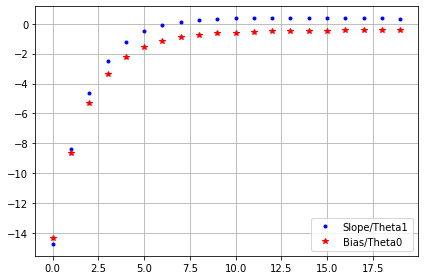

In [102]:
#grad_ar
plt.plot(iter_ar, grad_ar[:, 1], "b.", label="Slope/Theta1")
plt.plot(iter_ar, grad_ar[:, 0], "r*", label="Bias/Theta0")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

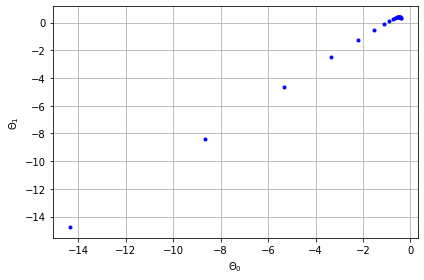

In [106]:
plt.plot(grad_ar[:, 0], grad_ar[:, 1], "b.")
plt.xlabel("$\Theta_{0}$")
plt.ylabel("$\Theta_{1}$")
plt.grid()
plt.tight_layout()
plt.show()

### Classical Stochastic Gradient Descent algorithm implementation

In [109]:
n_epochs = 50
#learning schedule hyperparameters
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

#random intialization
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m): #m is 100 defined above
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [110]:
#print regression results
print(f"Theta: {theta}")

Theta: [[4.0520646 ]
 [2.72952536]]


### Scikit-learn Stochastic Gradient Descent algorithm implementation

In [116]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [117]:
#pring theta0/intercepty/bias and theta1/slope terms
print(f"Bias term: {sgd_reg.intercept_}, Slope: {sgd_reg.coef_ }")

Bias term: [4.07508201], Slope: [2.83131898]
